In [53]:
from load_data import load_data
from hete_optim import gridsearch_hete_optim_action, hete_optim_action, lelu
import pandas as pd
import numpy as np

def load_data(scenario, directory = '/Users/sweiss/src/hete_net/hete_dgp/created_data/'):
  t = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_t.csv'))
  t_x = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_t_x.csv'))
  x = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_x.csv'))
  y = np.array(pd.read_csv(directory+'scenario_'+str(scenario)+'_y.csv'))

  t_train = t[:15000]
  t_x_train = t_x[:15000]
  x_train = x[:15000]
  y_train = y[:15000]

  t_test = t[15000:]
  t_x_test = t_x[15000:]
  x_test = x[15000:]
  y_test = y[15000:]

  return([t_train, t_test, t_x_train, t_x_test, x_train, x_test, y_train,y_test])

scenario_number = 1
t_train, t_test, t_x_train, t_x_test, X_train, X_test, y_train,y_test = load_data(scenario_number)


(array([  10.,   42.,  179.,  374., 1845.,  305.,  182.,   42.,   15.,
           6.]),
 array([-6.83289787, -5.23263667, -3.63237546, -2.03211426, -0.43185305,
         1.16840815,  2.76866936,  4.36893057,  5.96919177,  7.56945298,
         9.16971418]),
 <a list of 10 Patch objects>)

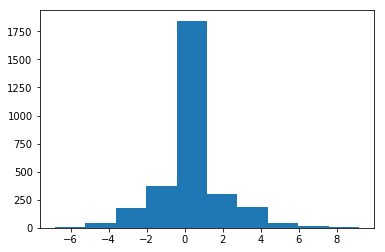

In [54]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.hist(t_x_test)

In [ ]:
model = hete_optim_action(X_train.shape[1],128,.5, 3, lelu )
dummy_y_train = np.concatenate([1-t_train, t_train, y_train], axis = 1)

model.fit([X_train,X_train[:,0]],np.array(dummy_y_train),epochs = 50)

Epoch 1/50
15000/15000 [==============================] - 2s 155us/step - loss: -0.1697
Epoch 2/50
15000/15000 [==============================] - 2s 106us/step - loss: -0.1726
Epoch 3/50
15000/15000 [==============================] - 2s 106us/step - loss: -0.1726
Epoch 4/50
15000/15000 [==============================] - 2s 103us/step - loss: -0.1726
Epoch 5/50
15000/15000 [==============================] - 2s 103us/step - loss: -0.1726
Epoch 6/50
 7712/15000 [==============>...............] - ETA: 0s - loss: -0.1731

0.08566666666666667
0.08566666666666667


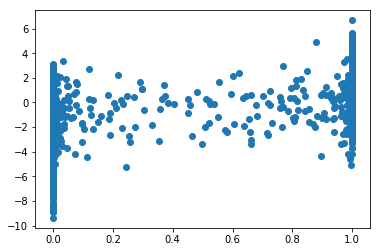

In [52]:
predictions = model.predict([X_test,X_test[:,0]])
print(y_test[np.where(predictions[:,1]>0)[0]].mean())
print(y_test[np.where(predictions[:,0]>0)[0]].mean())
plt.scatter(predictions[:,0], t_x_test)

In [ ]:


model = gridsearch_hete_optim_action(X_train, t_train, y_train)


predictions = model.predict([X_test,X_test[:,0]])
pd.DataFrame(predictions).to_csv('/Users/sweiss/src/hete_net/hete_dgp/predicted_data_hete_net/hete_preds_optim_'+str(scenario_number)+'.csv')
